In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("Merged_data.csv", index_col= 0)

FileNotFoundError: [Errno 2] No such file or directory: 'Merged_data.csv'

In [ ]:
data.head(5)

,Population,Firearm Count,Firearm Rate,County,Year,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
0,296677.0,183.0,61.7,Albany,2003.0,23954.0,2804.0,22.0,102.0,872.0,1808.0,21150.0,4136.0,15766.0,1248.0
1,298419.0,194.0,65.0,Albany,2004.0,25420.0,2862.0,28.0,154.0,962.0,1718.0,22558.0,3982.0,17224.0,1352.0
2,298859.0,260.0,87.0,Albany,2005.0,24238.0,3230.0,26.0,192.0,1022.0,1990.0,21008.0,4088.0,15780.0,1140.0
3,298210.0,200.0,67.1,Albany,2006.0,23870.0,3090.0,10.0,142.0,910.0,2028.0,20780.0,3484.0,16408.0,888.0
4,297154.0,208.0,70.0,Albany,2007.0,21168.0,2936.0,10.0,150.0,874.0,1902.0,18232.0,3170.0,14208.0,854.0


In [ ]:
data.Year.unique()

array([2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021., 2022.])

In [ ]:
crimeIndex = data.groupby("Year")["Index Total"].sum().reset_index()

In [ ]:
population = data.groupby("Year")["Population"].sum().reset_index()

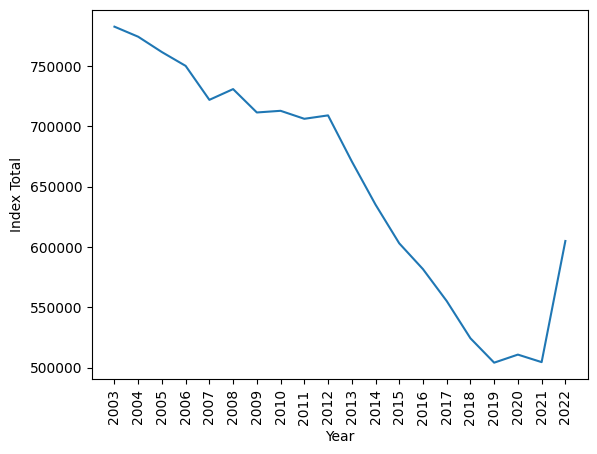

In [ ]:
import matplotlib.pyplot as plt
plt.plot(crimeIndex["Year"], crimeIndex["Index Total"])
plt.xlabel("Year")
plt.ylabel("Index Total")
plt.xticks(crimeIndex["Year"],rotation=90)
plt.show()

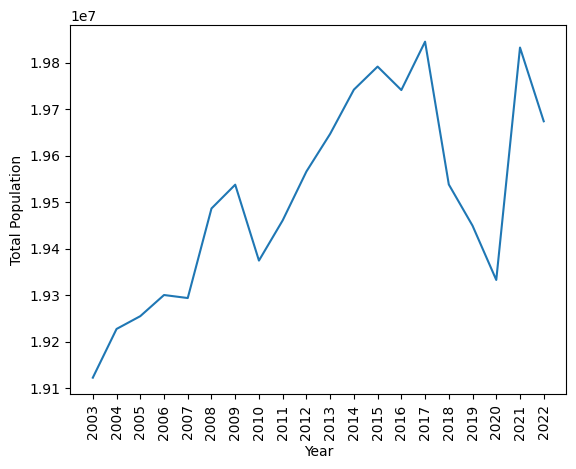

In [ ]:
plt.plot(population["Year"], population["Population"])
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.xticks(population["Year"],rotation=90)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
crimeIndex['Year'] = pd.to_datetime(crimeIndex['Year'], format='%Y')
crimeIndex.set_index("Year", inplace=True)
print(crimeIndex)

            Index Total
Year                   
2003-01-01     782740.0
2004-01-01     774404.0
2005-01-01     761666.0
2006-01-01     750212.0
2007-01-01     722049.0
2008-01-01     730963.0
2009-01-01     711581.0
2010-01-01     712962.0
2011-01-01     706340.0
2012-01-01     709157.0
2013-01-01     671057.0
2014-01-01     635175.0
2015-01-01     603062.0
2016-01-01     581654.0
2017-01-01     555204.0
2018-01-01     524306.0
2019-01-01     504076.0
2020-01-01     510767.0
2021-01-01     504527.0
2022-01-01     604990.0


In [ ]:
crimeIndex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2003-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index Total  20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [ ]:
np.isfinite(crimeIndex['Index Total'])

Year
2003-01-01    True
2004-01-01    True
2005-01-01    True
2006-01-01    True
2007-01-01    True
2008-01-01    True
2009-01-01    True
2010-01-01    True
2011-01-01    True
2012-01-01    True
2013-01-01    True
2014-01-01    True
2015-01-01    True
2016-01-01    True
2017-01-01    True
2018-01-01    True
2019-01-01    True
2020-01-01    True
2021-01-01    True
2022-01-01    True
Name: Index Total, dtype: bool

In [ ]:
print(crimeIndex)

            Index Total
Year                   
2003-01-01     782740.0
2004-01-01     774404.0
2005-01-01     761666.0
2006-01-01     750212.0
2007-01-01     722049.0
2008-01-01     730963.0
2009-01-01     711581.0
2010-01-01     712962.0
2011-01-01     706340.0
2012-01-01     709157.0
2013-01-01     671057.0
2014-01-01     635175.0
2015-01-01     603062.0
2016-01-01     581654.0
2017-01-01     555204.0
2018-01-01     524306.0
2019-01-01     504076.0
2020-01-01     510767.0
2021-01-01     504527.0
2022-01-01     604990.0


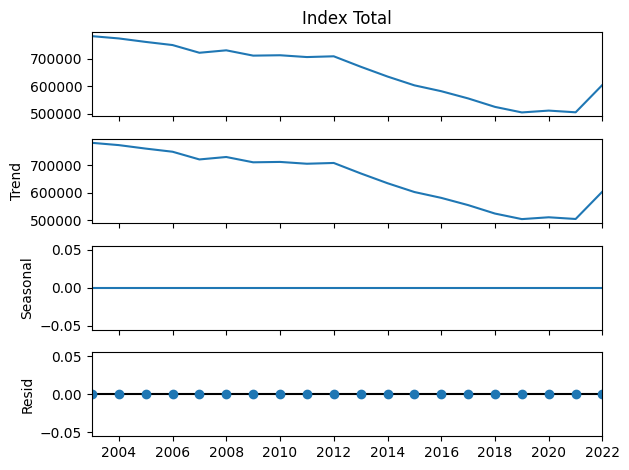

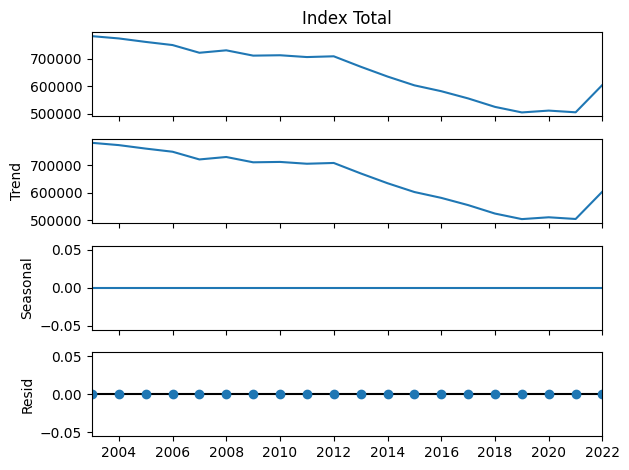

In [ ]:
result = seasonal_decompose(crimeIndex['Index Total'], model='additive')
result.plot()

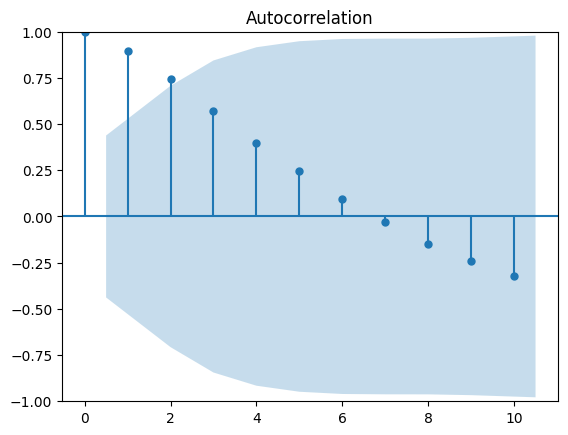

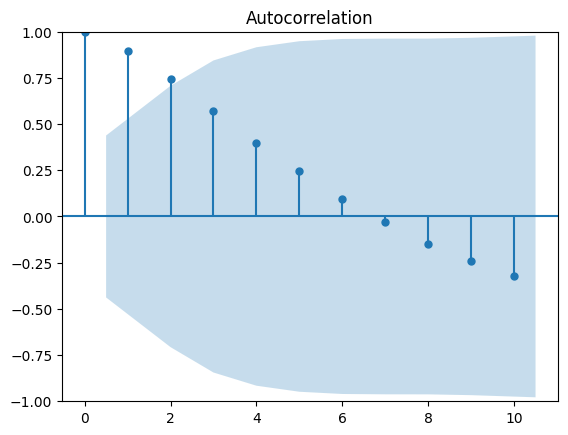

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(crimeIndex)

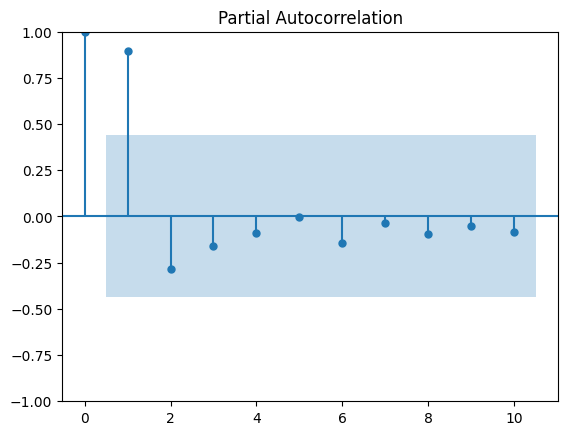

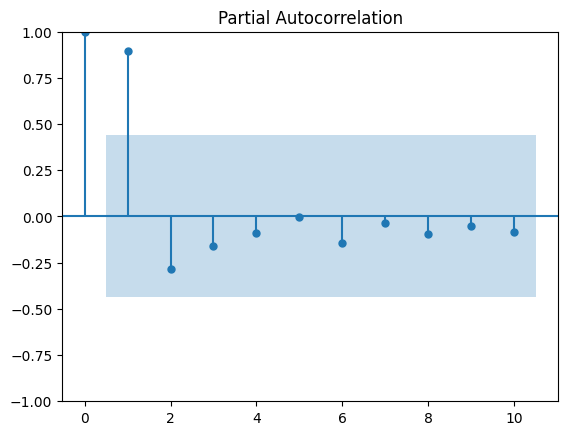

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(crimeIndex)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adftest(data):
    adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(data, autolag='AIC')
    print('ADF test statistic:', adf)
    print('ADF p-values:', pval)
    print('ADF number of lags used:', usedlag)
    print('ADF number of observations:', nobs)
    print('ADF critical values:', crit_vals)
    print('ADF best information criterion:', icbest)

In [ ]:
adftest(crimeIndex["Index Total"].values)

ADF test statistic: -1.4290945752213222
ADF p-values: 0.5682510950199796
ADF number of lags used: 8
ADF number of observations: 11
ADF critical values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF best information criterion: 260.0031784273153


first differenced results
ADF test statistic: -1.0250110227375109
ADF p-values: 0.7440331646367979
ADF number of lags used: 0
ADF number of observations: 18
ADF critical values: {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}
ADF best information criterion: 265.24943712229884
---------------------------------
second differenced results
ADF test statistic: -4.571662742985379
ADF p-values: 0.0001456285867344482
ADF number of lags used: 0
ADF number of observations: 17
ADF critical values: {'1%': -3.889265672705068, '5%': -3.0543579727254224, '10%': -2.66698384083045}
ADF best information criterion: 241.4336720393942


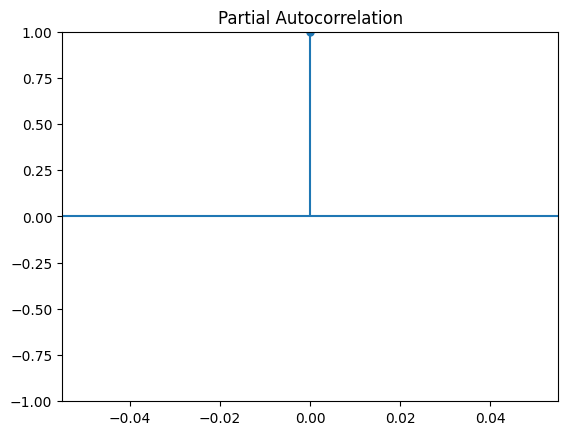

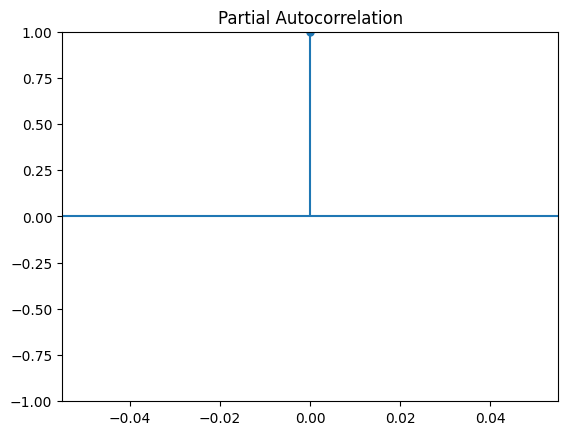

In [ ]:
first_differenced= crimeIndex["Index Total"].diff()
print("first differenced results")
adftest(first_differenced.dropna().values)
second_differenced = crimeIndex.diff().diff()
plot_pacf(first_differenced)
print("---------------------------------")
print("second differenced results")
adftest(second_differenced.dropna().values)
plot_pacf(second_differenced)
plt.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
train, test = train_test_split(crimeIndex["Index Total"].values, train_size=19)

In [ ]:
model = pm.auto_arima(crimeIndex["Index Total"].values, seasonal=False)
print(test)
preds = model.predict(2)

[604990.]


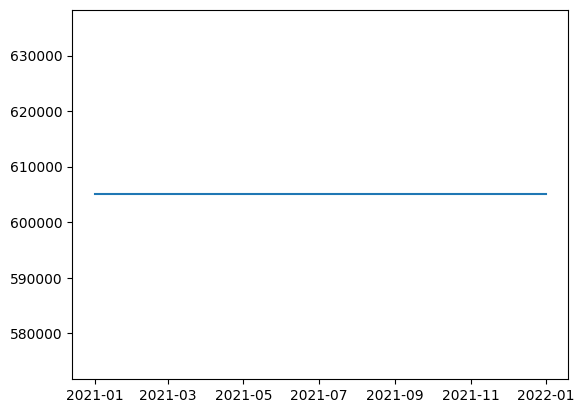

In [ ]:
#plt.plot(crimeIndex.index, )
plt.plot(crimeIndex.index[18:], preds)
plt.show()

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming `time_series` is your time series data
n_records = len(crimeIndex)
train_size = int(n_records * 0.7)  # Start with 60% of data as training
horizon = 1  # Forecast horizon (e.g., one time step ahead)
errors = []

for t in range(train_size, n_records - horizon):
    train, test = crimeIndex[0:t], crimeIndex[t:t+horizon]
    model = ARIMA(train, order=(1,2,1))  # Example: ARIMA model
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=horizon)
    error = mean_squared_error(test, predictions)
    errors.append(error)

# Calculate average error across all test windows
average_error = np.mean(errors)
print(f'Average MSE: {average_error}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

Average MSE: 223370107.30872542


In [ ]:
print(average_error)

223370107.30872542


In [ ]:
model = ARIMA(crimeIndex['Index Total'], order=(1, 2, 1))  # Adjust (p, d, q) based on your data
model_fit = model.fit()

# Forecast the next point
forecast = model_fit.forecast(steps=1)
print(forecast)

2023-01-01    705247.801745
Freq: AS-JAN, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


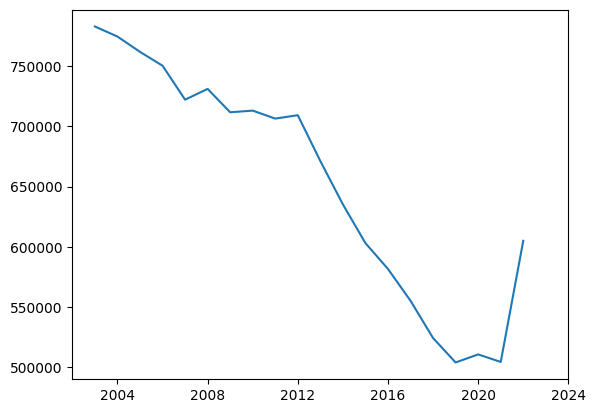

In [ ]:
plt.plot(crimeIndex.index, crimeIndex["Index Total"])
plt.plot(pd.to_datetime('2023'), forecast, label='2023 Forecast')  # 'ro' makes the forecast a red dotplt.show()
plt.show()

Normal forecast

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


data = pd.read_csv("Merged_data.csv", index_col=0)

def forecasting(category, crime):
    #create a global data variable and read the data.
    #Dont read the data in this function.
    if category == "total":
        crimeData = data.groupby("Year")[crime].sum().reset_index()

    else:
        crimeData = data.loc[data['County'] == category]
        crimeData = crimeData[["Year", crime]]

    crimeData['Year'] = pd.to_datetime(crimeData['Year'], format='%Y')
    crimeData.set_index("Year", inplace=True)
    d = differenciating(crimeData[crime])
    model = ARIMA(crimeData[crime], order=(1, d, 1))
    model_fit = model.fit()
    prediction = model_fit.predict()
    #print("predictions ", prediction)
    forecast = model_fit.forecast(steps=2)
    #print(crimeData)

    forecast_object = model_fit.get_forecast(steps=2)

    plt.plot(crimeData.index, crimeData[crime], label="Actual")
    plt.plot(pd.to_datetime(['2023','2024']), forecast,"ro", label='Forecast')
    plt.xlabel("Year")
    plt.ylabel("Crime Rate")
    plt.title(f"The {crime} rate of  {category}")
    plt.legend()
    plt.show()
    print("forecast for",crime," for ",category," is ",forecast)

    print("d ",d)
    #print(crimeData)

def adftest(data):
    adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(data, autolag='AIC')
    print('ADF test statistic:', adf)
    print('ADF p-values:', pval)
    print('ADF number of lags used:', usedlag)
    print('ADF number of observations:', nobs)
    print('ADF critical values:', crit_vals)
    print('ADF best information criterion:', icbest)
    print("_-------------------------------------------")
    return pval

def differenciating(data):
    count=0
    d=-1
    p_value = 1
    prev = 100
    while (p_value>0.05) and (count <=2):
        print(count)
        if count>0:
            print("differentiating")
            data = data.diff()
        p_value = adftest(data.dropna().values)
        print("P_value ",p_value)
        print("prev ",prev)
        if p_value<prev:
            d=count
            prev = p_value
        count+=1
    return d

0
ADF test statistic: -1.4290945752213222
ADF p-values: 0.5682510950199796
ADF number of lags used: 8
ADF number of observations: 11
ADF critical values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF best information criterion: 260.0031784273153
_-------------------------------------------
P_value  0.5682510950199796
prev  100
1
differentiating
ADF test statistic: -1.0250110227375109
ADF p-values: 0.7440331646367979
ADF number of lags used: 0
ADF number of observations: 18
ADF critical values: {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}
ADF best information criterion: 265.24943712229884
_-------------------------------------------
P_value  0.7440331646367979
prev  0.5682510950199796
2
differentiating
ADF test statistic: -4.571662742985379
ADF p-values: 0.0001456285867344482
ADF number of lags used: 0
ADF number of observations: 17
ADF critical values: {'1%': -3.889265672705068, '5%': -3.0543579727254224, '10%':

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


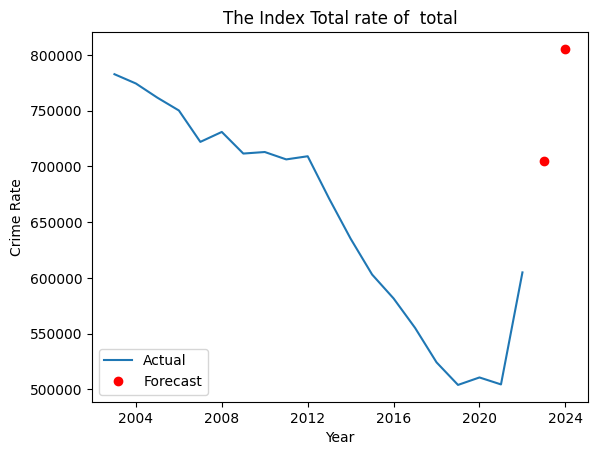

forecast for Index Total  for  total  is  2023-01-01    705247.801745
2024-01-01    805420.944352
Freq: AS-JAN, Name: predicted_mean, dtype: float64
d  2


In [ ]:
forecasting("total", "Index Total")

Out sample evaluation

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


data = pd.read_csv("Merged_data.csv", index_col=0)

def forecasting_test(category, crime):
    #create a global data variable and read the data.
    #Dont read the data in this function.
    if category == "total":
        crimeData = data.groupby("Year")[crime].sum().reset_index()

    else:
        crimeData = data.loc[data['County'] == category]
        crimeData = crimeData[["Year", crime]]

    crimeData['Year'] = pd.to_datetime(crimeData['Year'], format='%Y')
    crimeData.set_index("Year", inplace=True)
    d = differenciating(crimeData[crime])
    model = ARIMA(crimeData[crime][:-2], order=(1, d, 1))
    model_fit = model.fit()

    prediction = model_fit.predict()
    #print("predictions ", prediction)
    forecast = model_fit.forecast(steps=2)
    #print(crimeData)

    actuals = crimeData[crime][-2:]  # Adjust for differencing
    evaluate(actuals, forecast)

    plt.plot(crimeData.index[:-2], crimeData[crime][:-2], label="Actual")
    plt.plot(pd.to_datetime(['2021','2022']), forecast,"ro", label='Forecast')
    plt.xlabel("Year")
    plt.ylabel("Crime Rate")
    plt.title(f"The {crime} rate of  {category}")
    plt.legend()
    plt.show()
    print("forecast for",crime," for ",category," is ",forecast)

    #print(crimeData)

def evaluate(actuals, forecast):
    mse = mean_squared_error(actuals, forecast)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, forecast)
    mape = np.mean(np.abs((actuals - forecast) / actuals)) * 100

    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")


def adftest(data):
    adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(data, autolag='AIC')

    return pval

def differenciating(data):
    count=0
    d=-1
    p_value = 1
    prev = 100
    while (p_value>0.05) and (count <=2):
        #print(count)
        if count>0:
           #print("differentiating")
            data = data.diff()
        p_value = adftest(data.dropna().values)
        #print("P_value ",p_value)
        #print("prev ",prev)
        if p_value<prev:
            d=count
            prev = p_value
        count+=1
    return d

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


MSE: 3951650805.2094626
RMSE: 62862.15717909673
MAE: 47086.55523013603
MAPE: 7.872540807862443%


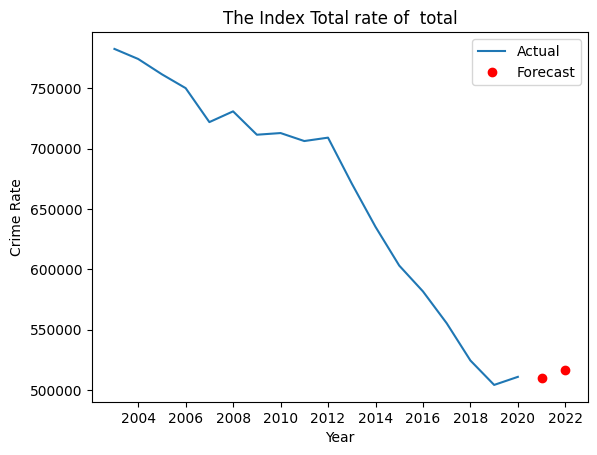

forecast for Index Total  for  total  is  2021-01-01    509966.140883
2022-01-01    516256.030423
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [ ]:
forecasting_test("total", "Index Total")

In-sample evaluation

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


data = pd.read_csv("Merged_data.csv", index_col=0)

def forecasting_insample(category, crime):
    #create a global data variable and read the data.
    #Dont read the data in this function.
    if category == "total":
        crimeData = data.groupby("Year")[crime].sum().reset_index()

    else:
        crimeData = data.loc[data['County'] == category]
        crimeData = crimeData[["Year", crime]]

    crimeData['Year'] = pd.to_datetime(crimeData['Year'], format='%Y')
    crimeData.set_index("Year", inplace=True)
    d = differenciating(crimeData[crime])
    model = ARIMA(crimeData[crime], order=(1, d, 1))
    model_fit = model.fit()
    prediction = model_fit.predict()
    #print("predictions ", prediction)
    forecast = model_fit.forecast(steps=2)
    #print(crimeData)


    evaluate(crimeData[crime], prediction)
    plt.plot(crimeData.index, crimeData[crime], label="Actual")
    plt.plot(crimeData.index, prediction, label="Predictions")
    plt.xlabel("Year")
    plt.ylabel("Crime Rate")
    plt.title(f"The {crime} rate of  {category}")
    plt.legend()
    plt.show()
    print("forecast for",crime," for ",category," is ",forecast)


    print("d ",d)
    #print(crimeData)

def evaluate(actuals, forecast):
    mse = mean_squared_error(actuals, forecast)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, forecast)
    mape = np.mean(np.abs((actuals - forecast) / actuals)) * 100

    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")


def adftest(data):
    adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(data, autolag='AIC')
    print('ADF test statistic:', adf)
    print('ADF p-values:', pval)
    print('ADF number of lags used:', usedlag)
    print('ADF number of observations:', nobs)
    print('ADF critical values:', crit_vals)
    print('ADF best information criterion:', icbest)
    print("_-------------------------------------------")
    return pval

def differenciating(data):
    count=0
    d=-1
    p_value = 1
    prev = 100
    while (p_value>0.05) and (count <=2):
        print(count)
        if count>0:
            print("differentiating")
            data = data.diff()
        p_value = adftest(data.dropna().values)
        print("P_value ",p_value)
        print("prev ",prev)
        if p_value<prev:
            d=count
            prev = p_value
        count+=1
    return d

0
ADF test statistic: -1.4290945752213222
ADF p-values: 0.5682510950199796
ADF number of lags used: 8
ADF number of observations: 11
ADF critical values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
ADF best information criterion: 260.0031784273153
_-------------------------------------------
P_value  0.5682510950199796
prev  100
1
differentiating
ADF test statistic: -1.0250110227375109
ADF p-values: 0.7440331646367979
ADF number of lags used: 0
ADF number of observations: 18
ADF critical values: {'1%': -3.859073285322359, '5%': -3.0420456927297668, '10%': -2.6609064197530863}
ADF best information criterion: 265.24943712229884
_-------------------------------------------
P_value  0.7440331646367979
prev  0.5682510950199796
2
differentiating
ADF test statistic: -4.571662742985379
ADF p-values: 0.0001456285867344482
ADF number of lags used: 0
ADF number of observations: 17
ADF critical values: {'1%': -3.889265672705068, '5%': -3.0543579727254224, '10%':

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


MSE: 62602475491.95093
RMSE: 250204.86704289133
MAE: 96101.66442671938
MAPE: 12.881027883438668%


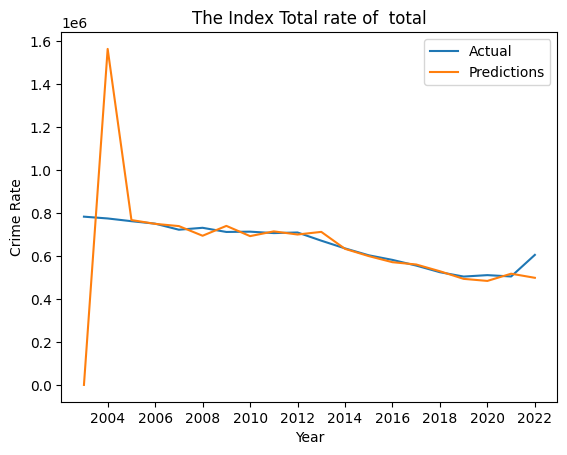

forecast for Index Total  for  total  is  2023-01-01    705247.801745
2024-01-01    805420.944352
Freq: AS-JAN, Name: predicted_mean, dtype: float64
d  2


In [ ]:
forecasting_insample('total', "Index Total")

PMDARIMA



In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("Merged_data.csv", index_col=0)

def forecasting(category, crime):
    if category == "total":
        crimeData = data.groupby("Year")[crime].sum().reset_index()

    else:
        crimeData = data.loc[data['County'] == category]
        crimeData = crimeData[["Year", crime]]

    crimeData['Year'] = pd.to_datetime(crimeData['Year'], format='%Y')
    crimeData.set_index("Year", inplace=True)

    auto_model = auto_arima(crimeData[crime], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

    auto_model.fit(crimeData[crime])

    forecast, conf_int = auto_model.predict(n_periods=2, return_conf_int=True)

    #
    plt.plot(crimeData.index, crimeData[crime], label="Actual")
    future_index = [crimeData.index[-1] + pd.DateOffset(years=i) for i in range(1, 3)]  # Assuming annual frequency
    plt.plot(future_index, forecast, "ro", label='Forecast')

    plt.fill_between(future_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

    plt.xlabel("Year")
    plt.ylabel("Crime Rate")
    plt.title(f"The {crime} rate of {category}")
    plt.legend()
    plt.show()

    print("Forecast for", crime, "for", category, "is", forecast)




Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=343.759, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=334.955, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=336.819, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=336.792, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=333.277, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.512 seconds


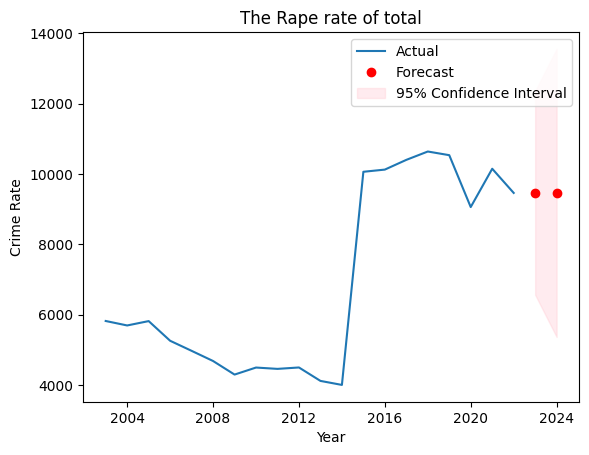

Forecast for Rape for total is 2023-01-01    9461.0
2024-01-01    9461.0
Freq: AS-JAN, dtype: float64


In [ ]:
forecasting('total', 'Rape')